## 🌱 Soil Health Index Prediction Model (Regression)

In [10]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import joblib


In [11]:
# Loading and preparing Data
df = pd.read_csv("/content/farming_data.csv")

In [12]:

# Drop rows with missing values in key columns
cols_needed = [
    "soil_pH", "soil_moisture", "temperature", "humidity",
    "rainfall", "pesticide_usage_ml", "crop_type", "region"
]
df = df.dropna(subset=cols_needed)

In [13]:
# Create Target Variable: Soil Health Index (0–1)

df["soil_health"] = 1 - (
    (abs(df["soil_pH"] - 6.5) / 2) +
    (df["pesticide_usage_ml"] / 100) +
    (abs(df["soil_moisture"] - 50) / 50)
)


In [14]:
# Clamp values between 0 and 1
df["soil_health"] = df["soil_health"].clip(0, 1)

In [15]:
# Feature Encoding and Scaling

features = [
    "soil_pH", "soil_moisture", "temperature", "humidity",
    "rainfall", "pesticide_usage_ml", "crop_type", "region"
]
X = df[features]
y = df["soil_health"]

# Encode categorical features
le_crop = LabelEncoder()
le_region = LabelEncoder()
X["crop_type"] = le_crop.fit_transform(X["crop_type"])
X["region"] = le_region.fit_transform(X["region"])

# Scale numeric features
scaler = StandardScaler()
num_cols = ["soil_pH", "soil_moisture", "temperature", "humidity", "rainfall", "pesticide_usage_ml"]
X[num_cols] = scaler.fit_transform(X[num_cols])


/tmp/ipython-input-3850729329.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["crop_type"] = le_crop.fit_transform(X["crop_type"])
/tmp/ipython-input-3850729329.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["region"] = le_region.fit_transform(X["region"])
/tmp/ipython-input-3850729329.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [16]:
# Split Data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
# Train Random Forest Regressor
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [18]:
# Evaluate Model

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Model Performance:")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")




✅ Model Performance:
Mean Absolute Error: 0.0020
R² Score: 0.9987


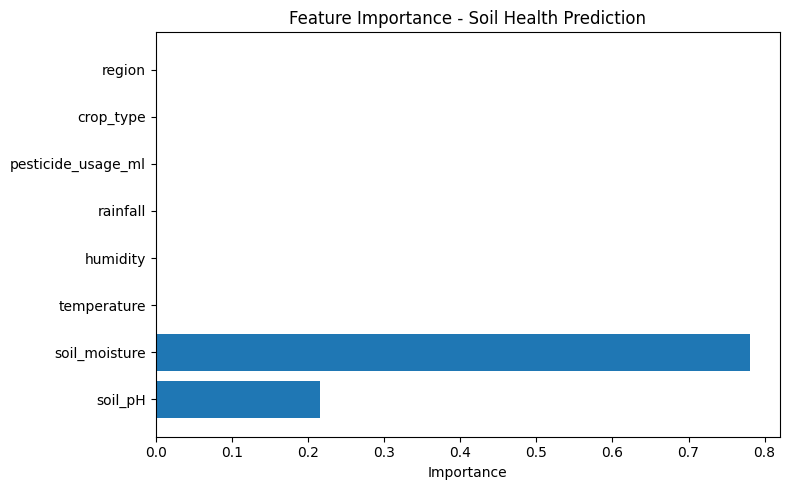

In [24]:
# Feature Importance

importances = model.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(X.columns, importances)
plt.title("Feature Importance - Soil Health Prediction")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [20]:
# Example Prediction


sample = pd.DataFrame([{
    "soil_pH": 6.0,
    "soil_moisture": 40,
    "temperature": 34,
    "humidity": 25,
    "rainfall": 0,
    "pesticide_usage_ml": 12,
    "crop_type": le_crop.transform(["Tomato"])[0],
    "region": le_region.transform(["UpperEgypt"])[0]
}])



In [21]:
# Scale numeric columns like in training
sample[num_cols] = scaler.transform(sample[num_cols])

predicted_health = model.predict(sample)[0]

print(f"\n🌱 Predicted Soil Health Index: {predicted_health:.2f}")
if predicted_health > 0.7:
    print("🟢 Soil Condition: Healthy")
elif predicted_health > 0.4:
    print("🟡 Soil Condition: Moderate")
else:
    print("🔴 Soil Condition: Poor")


🌱 Predicted Soil Health Index: 0.53
🟡 Soil Condition: Moderate


In [22]:
# Save Model & Encoders


joblib.dump(model, "soil_health_model.pkl")
joblib.dump(scaler, "soil_scaler.pkl")
joblib.dump(le_crop, "crop_encoder.pkl")
joblib.dump(le_region, "region_encoder.pkl")
print("\n💾 Model and encoders saved successfully!")



💾 Model and encoders saved successfully!


In [23]:
# 🧪 Test Multiple Soil Scenarios

test_samples = pd.DataFrame([
    {
        "soil_pH": 6.5, "soil_moisture": 50, "temperature": 28,
        "humidity": 45, "rainfall": 2, "pesticide_usage_ml": 0,
        "crop_type": le_crop.transform(["Wheat"])[0],
        "region": le_region.transform(["NileDelta"])[0]
    },
    {
        "soil_pH": 8.0, "soil_moisture": 30, "temperature": 35,
        "humidity": 20, "rainfall": 0, "pesticide_usage_ml": 15,
        "crop_type": le_crop.transform(["Tomato"])[0],
        "region": le_region.transform(["UpperEgypt"])[0]
    },
    {
        "soil_pH": 5.8, "soil_moisture": 60, "temperature": 27,
        "humidity": 60, "rainfall": 5, "pesticide_usage_ml": 5,
        "crop_type": le_crop.transform(["Rice"])[0],
        "region": le_region.transform(["Sinai"])[0]
    },
    {
        "soil_pH": 7.2, "soil_moisture": 70, "temperature": 32,
        "humidity": 35, "rainfall": 1, "pesticide_usage_ml": 25,
        "crop_type": le_crop.transform(["Onion"])[0],
        "region": le_region.transform(["UpperEgypt"])[0]
    },
    {
        "soil_pH": 6.1, "soil_moisture": 48, "temperature": 25,
        "humidity": 55, "rainfall": 4, "pesticide_usage_ml": 2,
        "crop_type": le_crop.transform(["Olive"])[0],
        "region": le_region.transform(["Sinai"])[0]
    },
    {
    "soil_pH": 6.5,"soil_moisture": 50, "temperature": 22,
    "humidity": 80,"rainfall": 6, "pesticide_usage_ml": 0,
    "crop_type": le_crop.transform(["Rice"])[0],
    "region": le_region.transform(["NileDelta"])[0]
    }
])

# Scale numeric columns like in training
test_samples[num_cols] = scaler.transform(test_samples[num_cols])

# Predict soil health
predictions = model.predict(test_samples)

# Combine predictions with readable labels
test_samples["predicted_soil_health"] = predictions
test_samples["condition"] = test_samples["predicted_soil_health"].apply(
    lambda x: "🟢 Healthy" if x > 0.7 else ("🟡 Moderate" if x > 0.4 else "🔴 Poor")
)

# Decode categorical columns back for readability
test_samples["crop_type"] = le_crop.inverse_transform(test_samples["crop_type"])
test_samples["region"] = le_region.inverse_transform(test_samples["region"])

# Show results
print("\n🌿 Soil Health Predictions:")
print(test_samples[[
    "crop_type", "region", "soil_pH", "soil_moisture",
    "pesticide_usage_ml", "predicted_soil_health", "condition"
]])



🌿 Soil Health Predictions:
  crop_type      region   soil_pH  soil_moisture  pesticide_usage_ml  \
0     Wheat   NileDelta -6.192035      -1.917557           -0.096638   
1    Tomato  UpperEgypt  1.805136      -4.070894           11.042133   
2      Rice       Sinai -9.924048      -0.840889            3.616285   
3     Onion  UpperEgypt -2.460022       0.235780           18.467980   
4     Olive       Sinai -8.324613      -2.132891            1.388531   
5      Rice   NileDelta -6.192035      -1.917557           -0.096638   

   predicted_soil_health   condition  
0               0.694899  🟡 Moderate  
1               0.110381      🔴 Poor  
2               0.470863  🟡 Moderate  
3               0.103992      🔴 Poor  
4               0.691693  🟡 Moderate  
5               0.695197  🟡 Moderate  
